In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn import metrics

In [2]:
#import dataset
dataset=pd.read_csv("C:/Users/happy/Desktop/Strathclyde academic/CS989/Assigment/SouthGermanCredit/dat.csv",low_memory=False)

In [3]:
dataset.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [4]:
# convert credit_risk to binary: good=1, bad=0
dataset['credit_risk']=dataset['credit_risk'].map(dict(good=1, bad=0))
dataset.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,1
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,1


In [5]:
#change credit_risk from string to int to prepare for log regression
dataset["credit_risk"]=pd.to_numeric(dataset["credit_risk"])

In [6]:
#check credit_risk is int
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [7]:
#create dummies for status and drop first column 
status_1=pd.get_dummies(dataset["status"],drop_first=True)
status_1.head()

,... >= 200 DM / salary for at least 1 year,0<= ... < 200 DM,no checking account
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,1
4,0,0,1


In [8]:
#create dummies for credit history and drop first column 
credit_history_1=pd.get_dummies(dataset["credit_history"],drop_first=True)
credit_history_1.head()

,critical account/other credits elsewhere,delay in paying off in the past,existing credits paid back duly till now,no credits taken/all credits paid back duly
0,0,0,0,0
1,0,0,0,0
2,0,0,0,1
3,0,0,0,0
4,0,0,0,0


In [9]:
# add dummy columns to dataset
dataset1=pd.concat([dataset,status_1,credit_history_1],axis=1)
dataset1.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,telephone,foreign_worker,credit_risk,... >= 200 DM / salary for at least 1 year,0<= ... < 200 DM,no checking account,critical account/other credits elsewhere,delay in paying off in the past,existing credits paid back duly till now,no credits taken/all credits paid back duly
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,no,no,1,0,0,1,0,0,0,0
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,no,no,1,0,0,1,0,0,0,0
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,no,no,1,0,0,0,0,0,0,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,no,yes,1,0,0,1,0,0,0,0
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,no,yes,1,0,0,1,0,0,0,0


In [10]:
# drop columns not used for log regression
dataset1.drop(['status','credit_history','purpose','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker'],axis=1,inplace=True)

In [11]:
#check new dataset for log regression
dataset1.head()

,duration,amount,credit_risk,... >= 200 DM / salary for at least 1 year,0<= ... < 200 DM,no checking account,critical account/other credits elsewhere,delay in paying off in the past,existing credits paid back duly till now,no credits taken/all credits paid back duly
0,18,1049,1,0,0,1,0,0,0,0
1,9,2799,1,0,0,1,0,0,0,0
2,12,841,1,0,0,0,0,0,0,1
3,12,2122,1,0,0,1,0,0,0,0
4,12,2171,1,0,0,1,0,0,0,0


In [12]:
#Define x and y
X = dataset1.drop(["credit_risk"], axis=1)
y = dataset1["credit_risk"]

In [13]:
from sklearn import model_selection
#split train 70% and test 30%
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
# fit model
logmodel = LogisticRegression()

In [16]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [17]:
predictions=logmodel.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

In [25]:
from sklearn.metrics import confusion_matrix

In [23]:
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.17      0.26        99
           1       0.70      0.94      0.80       201

    accuracy                           0.68       300
   macro avg       0.63      0.55      0.53       300
weighted avg       0.65      0.68      0.62       300

[[ 17  82]
 [ 13 188]]


Text(0.5, 15.0, 'Predictions')

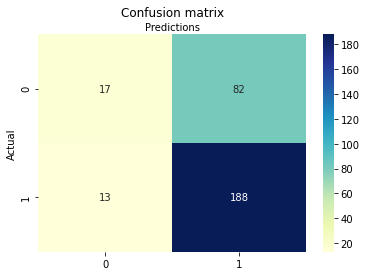

In [21]:
con_matrix = metrics.confusion_matrix(y_test, predictions)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(con_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predictions')